# Symbolic Computing with SymPy

Use of Computer Algebra Systems (CAS) or symbolic computing relates to symbolic mathematical operations to be contrasted with the floating point mathematics of numerical computation.  Symbolic computing should be viewed as complementary to numerical computing, and both can be extremely helpful in the course of your research.  We will focus here on symbolic computing in SymPy, a Python based CAS.

There are many other CAS packages avaialble (see for example: https://en.wikipedia.org/wiki/List_of_computer_algebra_systems).  We will work with SymPy because it is free, open-source, built in Python, and accessible from anywhere.  SageMath is a related, but more complete solution with similar advantages but more overhead.

This lesson is developed from the official SymPy tutorial, available with more detail at http://docs.sympy.org/latest/tutorial/index.html.

A working version of SymPy can be accessed from anywhere by going to http://live.sympy.org

To get started with SymPy, we need to import the library.  If the library is not avaialble, you need to run `pip install sympy --user` in your terminal.

In [1]:
%matplotlib inline
from sympy import *

One advantage of a CAS such as SymPy is that irrational numbers are treated exactly, rather than approximately.

In [2]:
pi

pi

In [3]:
E # Euler's number

E

In [4]:
sqrt(8)

2*sqrt(2)

Compare this to what we would have gotten using the definition of `sqrt()` in the math package.

In [5]:
import math
math.sqrt(8)

2.8284271247461903

Another advantage of SymPy is that it can produce pretty output, including LaTeX.  Let us now turn on the LaTeX printer for SymPy.

In [6]:
init_printing(latex)

Just like elsewhere in Python, one needs to be careful about how division is treated due to the assumed data types of the input.  Try evaluating the follwing cells.

In [7]:
1/3

In [8]:
1./3

In [9]:
S(1)/3

Though these expressions look similar, they give different results.  The result of the first cell even depends on your version of Python.  The third cell coverts the 1 from an `int` to a SymPy object, and returns a SymPy `Rational`.  You can always check your data type with the `type()` command.

In [10]:
type(1)

int

In [11]:
type(1.)

float

In [12]:
type(S(1))

sympy.core.numbers.One

In [16]:
type(S(1)/3)

sympy.core.numbers.Rational

The main advantage of any CAS, however is its ability to deal with variables, which are called symobls in SymPy.  We first have to define symbols that will then be treated as SymPy objects.

In [17]:
w, x, y, z, t, nu, sigma = symbols('w x y z t nu sigma')

In [18]:
expr = x**2+2*y
expr

In [21]:
expr + 1

In [ ]:
expr - y

In [ ]:
expr * x

In [ ]:
expr**2

In [ ]:
expand(expr**2)

In [ ]:
x**nu+sigma

You can see from these examples that SymPy does some straightforward simplifications automatically, but exressions are neither factored nor expanded unless explicit commands are given.  There are also several built-in characters which will produce nice LaTeX output.

### Exercise 1

Write $(w+1/3)^3 + (w^2-2w+12)^2 - (w/4)^4$ in expanded polynomial form.

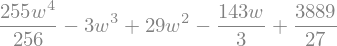

In [36]:
expression = (w+S(1)/3)**3 + (w**2 - S(2)*w + S(12))**2 - (w/4)**4
expand(expression)

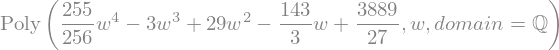

In [37]:
Poly.from_expr(expression)

# Quick Examples of SymPy Capabilities

## Derivatives

In [29]:
diff(exp(x**2), x)

In [30]:
diff(x**7, x)

In [31]:
diff(x**7, x, x)

In [32]:
diff(x**7, x, 3)

In [33]:
diff(x**2 * y**3, x, y)

In [34]:
diff(sin(x)**2, x)

In [35]:
diff(exp(x)*cos(x), x)

Multiple derivatives can be taken by repeating the variable, or by indicating the order of the derivative with an integer.

### Exercise 2

Find the first and second derivatives of $\frac{1}{\log(w^2+1/2)}$ with respect to $w$.

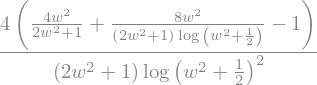

In [52]:
first_deriv = diff(S(1)/(log(w**2+S(1)/2)), w)
second_deriv = diff(S(1)/(log(w**2+S(1)/2)), w, 2)

first_deriv

second_deriv

## Integrals

In [42]:
integrate(2*x, x)

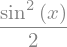

In [43]:
integrate(sin(x)*cos(x), x)

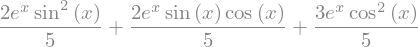

In [44]:
integrate(exp(x)*cos(x)**2, x)

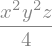

In [45]:
integrate(y*x*z, x, y)

In [46]:
integrate(cos(x), (x, 1, 2))

In [47]:
integrate(exp(-x**2), (x, -oo, oo))

Note that infinity is written as two small 'o' characters.

### Exercise 3

Calculate the following definte integral: $\int_0^{e^4} \log(w) \, \mathrm{d}w$.

In [53]:
expr = log(w)
value = integrate(expr, (w,0,E**4))
value

## Limits

In [54]:
limit( (x**2 - 1)/(x - 1), x, 1)

In [55]:
limit( (5*x**4 + 3*x**2)/(2*x**4 - 20*x**3 + 4), x, oo)

In [ ]:
limit( sin(x)/x, x, 0)

In [ ]:
limit(1/x, x, 0, '+')

In [57]:
limit(1/x, x, 0, '-')

In [56]:
print(limit(1/x,x,0, '-'))

-oo


### Exercise 4

Calculate the limit: $$\lim_{w \rightarrow 1} \left(\frac{w}{3w-3} - \frac{1}{3\log w} \right) $$

## Solving Algebraic Equations

The function `solve()` assumes that the expression is equal to zero unless the SymPy `Eq()` is used.

In [58]:
solve(x**2 - 9, x)

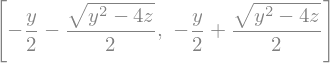

In [59]:
solve( x**2 + y*x + z, x)

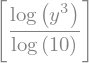

In [60]:
solve(10**x - y**3, x)

In [61]:
solve(tan(x) - y**2, x)

In [62]:
solve(x**2 + 1, x)

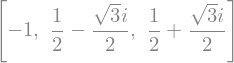

In [63]:
solve(x**3 + 1, x)

### Exercise 5

Solve the following expression for $w$: $\sqrt{5}w + 3w^2 = 2/7$

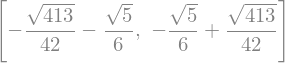

In [64]:
expr = sqrt(5)*w + 3*w**2-S(2)/7
solve(expr, w)

## Solving Differential Equations

The function `dsolve()` can be used to solve ordinary differential equations after defining `Function` symbols.

In [65]:
f, g, h = symbols('f g h', cls=Function)

In [66]:
dsolve(diff(f(x), x) - f(x), f(x))

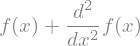

In [68]:
test_2 = diff(f(x), x, x) + f(x)
test_2

In [ ]:
test_2

In [69]:
dsolve(test_2, f(x))

In [70]:
dsolve(diff(f(x), x, x) + f(x), f(x))

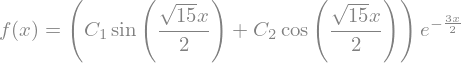

In [71]:
dsolve(diff(f(x), x, x) + 3 * diff(f(x), x ) + 6 * f(x), f(x))

There is also a `pdsolve()` for partial differential equations.

In [72]:
pdsolve(2*diff(f(x,y),x)/f(x,y) + 3*diff(f(x,y), y)/f(x,y) + 1, f(x,y))

### Exercise 6

Solve $f'(x) = f^2(x)$ where $f(1/3) = 5/2$.

In [73]:
test_6 = diff(f(x), x) - f(x)**2

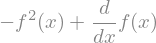

In [74]:
test_6

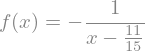

In [75]:
dsolve(test_6, f(x), ics={f(S(1)/3):S(5)/2})

# Basic Manipulation

## Substitution and Numerical Evaluation

All instances of a variable in an expression can be replaced with the subs() command.

In [ ]:
expr = 4*x**2 + 3*x + 1
expr

In [ ]:
type(expr)

In [ ]:
expr.subs(x, 2)

In [ ]:
expr.subs(x, y+z)

In [ ]:
expr = x**2 * y**2 + 3 * x * y**2 + 4*x - 12*z
expr

In [ ]:
expr.subs([(x,3), (y,-1), (z,2)])

The `evalf()` command is used to evaluate an expression as a floating point number to an arbitrary number of digits.

In [ ]:
expr = sqrt(8)
expr

In [ ]:
expr.evalf(40)

In [ ]:
expr = sqrt(x)
expr

In [ ]:
expr.evalf(subs={x: 2}, n=7)

In [ ]:
help(expr.evalf)

In [ ]:
pi.evalf(100)

#use xreplace instead of subs because it is often faster.

### Exercise 7

Find the numerical value of the expression $x^{1/3} + \sqrt{5} x^2 - \log x$ for $x=1,2,\ldots,10$

## Simplification

The function `simplify()` attempts to give the simplest form of an expression.

In [ ]:
expr = sin(x)**2 + cos(x)**2
expr

In [ ]:
simplify(sin(x)**2 + cos(x)**2)

In [ ]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [ ]:
simplify(gamma(x)/gamma(x - 2))

Expressions are typically not expanded or factored by `simplify()`, but can be forced to do so by `expand()` and `factor()`.

In [ ]:
expand((x + 1)**4)

In [ ]:
factor(x**2 + 2*x + 1)

`collect()` can be used to group common powers of a given term in an expression.

In [ ]:
collect(4*x**2 + 3*x + 6*z*x**2 + y*x + 1, x)

# Calculus

There are tools for performing calculus operations as well as creating unevaluated derivatives, integrals, and series, which can be evaluated with the `doit()` command.

In [ ]:
diff(log(x), x)

In [ ]:
expr = sin(x)*y**2
expr

In [ ]:
expr.diff(x, x, y)

In [ ]:
deriv = Derivative(exp(x**2*y),x,y)
deriv

In [ ]:
deriv.doit()

In [ ]:
integrate(exp(x)*x**2, x)

In [ ]:
integ = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))
integ

In [ ]:
integ.doit()

In [ ]:
limit(tan(x)/x, x, 0)

In [ ]:
expr = Limit(sqrt(sin(x))/sqrt(x),x,0)
expr

In [ ]:
expr.doit()

## Series Expansions

SymPy can perform Taylor series expansions of a given function about a specified point to a desired order (which defaults to 6).

In [ ]:
series(exp(x), x, 0, 8)

In [ ]:
expr = atan(x)
expr.series(x, 0)

In [ ]:
series(f(x), x, 1)

In [ ]:
series(exp(1/x), x, oo)

In [ ]:
series(1/sin(x), x, 0)

### Exercise 8

Find the series expansion of $\mathrm{sinc}(x)$ about $x=0$

In [ ]:
expr = sinc(x)

## Linear Algebra

SymPy can also handle symbolic computing of vectors and matrices.

In [ ]:
A = Matrix([[sqrt(2),0],[pi,E]])
A

In [ ]:
B = Matrix([[x,y],[z,w]])
B

In [ ]:
B.inv()

In [ ]:
B**(-1)

In [ ]:
B**2

In [ ]:
B.T

In [ ]:
3*B

In [ ]:
V = Matrix([2*x,5*z])
V

In [ ]:
B*V

In [ ]:
(V.T)*B

In [ ]:
B.det()

In [ ]:
B.rref()

In [ ]:
help(B.rref())

# Printing

We have so far seen that SymPy can produce nice LaTeX output for easy reading.  It can also produce output which is easily transferrable for other uses.

In [ ]:
expr = Piecewise((x + 1, x > 0), (x, True))
expr

In [ ]:
print(latex(expr))

In [ ]:
print(ccode(expr))

In [ ]:
# print(fcode(expr))

In [ ]:
print(python(expr))

In [ ]:
expr = Eq(x**2 + 2*log(3*y), z)
expr

In [ ]:
print(latex(expr))

In [ ]:
print(ccode(expr))

In [ ]:
print(fcode(expr))

In [ ]:
expr = Integral(exp(-x**2-y**2), (x, 0, oo), (y, 0, oo))
expr

In [ ]:
print(latex(expr))

In [ ]:
print(python(expr))

# Detailed Example: The Quantum Harmonic Oscillator

Let us now see how we can use what we have learned about SymPy to treat a realistic physical problem: the 1-d quantum harmonic oscillator (following Griffiths Quantum Mechanics).  In particular, we wish to find the wavefunctions and energy levels of a particle of mass $m$ in a potential $V(x) = \frac{1}{2} m \omega^2 x^2$.  We need to solve the time-independent Schrodinger equation.
$$-\frac{\hbar^2}{2m}\frac{d^2\phi}{dx^2} + \frac{1}{2} m \omega^2 x^2 \phi = E \phi$$
Let's put this in a slightly more convenient form
$$ \frac{d^2\phi}{d\xi^2} = (\xi^2 - K)\phi $$
where we have defined $\xi \equiv \sqrt{\frac{m\omega}{\hbar}}x$ and $K \equiv \frac{2E}{\hbar\omega} $.  We will now define the relevant quantities for SymPy manipulation.

In [ ]:
phi, f = symbols('phi f', cls=Function)
xi, K, c = symbols('xi K c')

Notice that for large $\xi$, we can neglect the $K$ on the right hand side of the equation.  In this regime, we can easily find approximate solutions to the approximate version of Schrodinger's equation.

In [ ]:
schrod_approx = Eq(diff(phi(xi),xi,xi), xi**2*phi(xi))
schrod_approx

In [ ]:
A, B = symbols('A B')
sol_approx = A*exp(xi**2/2) + B*exp(-xi**2/2)
sol_approx

Let's check that this is indeed an approximate solution.

In [ ]:
diff(sol_approx,xi,xi)

We see that in the regime $\xi\rightarrow\infty$, this is indeed an approximate solution to Schrodinger's equation.  We can also see that the term proportional to $A$ blows up as $\xi\rightarrow\infty$ and is thus unphysical.  We therefore take the term proportional to $B$ to be our approximate solution in this regime.  We can the simplify the subsequent steps by separating out this exponential piece of the solution.  Let us define
$$\phi(\xi) \equiv h(\xi) e^{-\xi^2/2}$$

In [ ]:
h = symbols('h', cls=Function)
phi_sub = h(xi)*exp(-xi**2/2)
phi_sub

In [ ]:
phi_prime = diff(phi_sub, xi)
phi_prime

In [ ]:
phi_prime_prime = diff(phi_prime, xi)
phi_prime_prime

In [ ]:
schrod_h = simplify(phi_prime_prime - (xi**2-K)*phi_sub)
schrod_h

We can now solve the simpler differential equation without the exponential part.

In [ ]:
schrod_h_simp = simplify(schrod_h * exp(xi**2/2))
schrod_h_simp

This type of differential equation can typically be solved as a power series.

In [ ]:
j, n = symbols('j n', integer=True)
schrod_series = schrod_h_simp.subs(h(xi), Sum(f(j)*xi**j,(j,0,oo)))
schrod_series

In [ ]:
schrod_series.doit()

Now we can read off the coefficient of $\xi^j$ which gives a recursive expression for $f(j)$.

In [ ]:
schrod_recursive = Eq((j+1)*(j+2)*f(j+2) - 2*j*f(j) + (K - 1) * f(j),0)
schrod_recursive

In [ ]:
Eq(f(j+2),solve(schrod_recursive, f(j+2))[0])

This defines a recursive relation for the coefficients of the power series solution which depends on the two arbitrary constants $f(0)$ and $f(1)$.  In order for our soution to be normalizable, we must require that the series truncates, and so $f(n) = 0$ for some finite $n$ and also that $f(0) = 0$ for $n$ odd and $f(1) = 0$ for $n$ even.  We therefore find that $K = 2n+1$ and so
$$ E_n = \left( n+\frac{1}{2}\right) \hbar \omega \, $$
With this choice of $K$, we have
$$ f(j+2) = \frac{-2(n-j)}{(j+1)(j+2)}f(j) $$

In [ ]:
def h_sol(n):
    g = symbols('g', cls=Function)
    F = 0
    if n % 2 == 0:
        F = c
        g = F
        for j in range (2, n+1, 2):
            F *= S(-2)*(n-(j-2))/((j-1)*j)
            g += F*xi**j
    else:
        F = c
        g = F*xi
        for j in range (3, n+1, 2):
            F *= S(-2)*(n-(j-2))/((j-1)*j)
            g += F*xi**j
    return g

In [ ]:
h_sol(3)

Finally, we arrive at the wavefunctions for the stationary states of the quantum harmonic oscillator.

In [ ]:
phi_sol = h_sol(7)*exp(-xi**2/2)
phi_sol

In [ ]:
norm_c = solve(integrate(phi_sol**2, (xi, -oo, oo))-1,c)[1]
norm_c

In [ ]:
norm_phi_sol = simplify(phi_sol.subs(c, norm_c))
norm_phi_sol

In [ ]:
for i in range(0,6):
    phi_sol = h_sol(i)*exp(-xi**2/2)
    norm_c = solve(integrate(phi_sol**2, (xi, -oo, oo))-1,c)[1]
    norm_phi_sol = simplify(phi_sol.subs(c, norm_c))
    p1 = plot(norm_phi_sol, norm_phi_sol**2, (xi, -5, 5))